In [30]:
import matplotlib.pyplot as plt  #bazı algoritmalar  var mesela harris köşe  2 kenar var bunlar birleşince kenar çıkıyor 
%matplotlib inline
import numpy as np
import cv2


In [ ]:
Watershed algoritmasının temel amacı, bir görüntüdeki farklı nesneleri veya bölgeleri birbirinden ayırmaktır. 
Bu, özellikle nesnelerin sınırlarının belirsiz olduğu durumlarda kullanılır. Watershed, gradyan tabanlı bir segmentasyon 
yöntemidir, yani piksel değerlerindeki yoğunluk değişimlerini (gradyan) kullanarak nesneler arasındaki sınırları belirler.


Nasıl Çalışır:
Watershed algoritması, coğrafi bir analoji kullanarak çalışır:

Görüntüyü bir topografik yüzey gibi düşünürseniz, parlak alanlar yüksek tepeleri ve karanlık alanlar vadileri temsil eder.
Algoritma, düşük yoğunluklu (vadilerdeki) noktalardan başlar ve "su" dolmaya başlar. Bu su seviyesi yükseldikçe farklı vadiler 
(nesneler) arasında sınırlar oluşturulur.
Sınırlar, vadiler farklı su bölgelerine ayrıldığında belirgin hale gelir. Bu sınırlar, farklı segmentleri (nesneleri) ayıran çizgilerdir.

In [ ]:
Watershed Algoritmasının Adımları:
Görüntü Gradyanının Hesaplanması: Watershed algoritması gradyan üzerinde çalışır. Gradyan, pikseller arasındaki yoğunluk
farklarının hesaplanmasıdır. Kenarlar, yüksek gradyan değerlerine sahip alanlar olarak belirlenir
.

Ön İşaretleyicilerin (Markers) Tanımlanması: Algoritmanın hangi bölgelerden başlayacağını belirtmek için ön işaretleyiciler 
kullanılır. Bu işaretleyiciler, genellikle nesnelerin iç bölgelerini ve arka planı temsil eder. Bu sayede algoritma, 
hangi bölgelerin su doldurmaya başlayacağını belirler.


Segmentasyon (Watershed Algoritmasının Uygulanması): Algoritma, su dolma işlemine başlar ve farklı bölgeler arasındaki
sınırları bulur. Bu sınırlar, segmentasyon işleminin sonucunda elde edilen ayrımlardır.


Sonuç: Algoritma, nesneler arasındaki sınırları belirleyerek her nesneyi farklı bir bölge olarak tanımlar.

    
Watershed Algoritmasının Avantajları:
Belirsiz Sınırları Bulma: Nesnelerin birbirine çok yakın olduğu ve sınırların bulanık olduğu durumlarda oldukça etkili bir algoritmadır.
Her Pikseli Kapsar: Watershed algoritması tüm pikselleri sınıflandırarak bir segmentasyona ulaşır, bu yüzden her piksel birmbölgeye ait olur.

Watershed Algoritmasının Dezavantajları:
Over-Segmentation (Aşırı Segmentasyon): Görüntü çok gürültülü (noise içeriyorsa) veya çok fazla detay içeriyorsa,
Watershed algoritması aşırı segmentasyon yapabilir ve çok sayıda küçük segment oluşturabilir.
Bu tür durumlarda, ön işleme (örneğin gürültü azaltma veya bulanıklaştırma gibi) yapmak veya ön işaretleyiciler
(markers) kullanmak, segmentasyonun doğruluğunu artırabilir.

Watershed Algoritmasının Uygulama Alanları:
Tıbbi Görüntüleme: Örneğin, tümörlerin veya hücrelerin segmentasyonu gibi tıbbi görüntülerde nesneleri ayırmak için kullanılır.
Nesne Tespiti: Birden fazla nesnenin olduğu bir sahnede, nesneleri birbirinden ayırmak için kullanılır.
Görüntü Segmentasyonu: Görüntüdeki farklı bölgeleri veya nesneleri ayırarak nesne tanıma gibi uygulamalarda kullanılabilir.

#çok gürültü veya detay içeriyorsa ön işlemeye tabi tutulup ya bulanıklaştırma ya gürültü azaltımı yapılır 

In [2]:
def display(img,cmap="gray"):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

In [5]:
sepcoins=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\pennies.jpg")

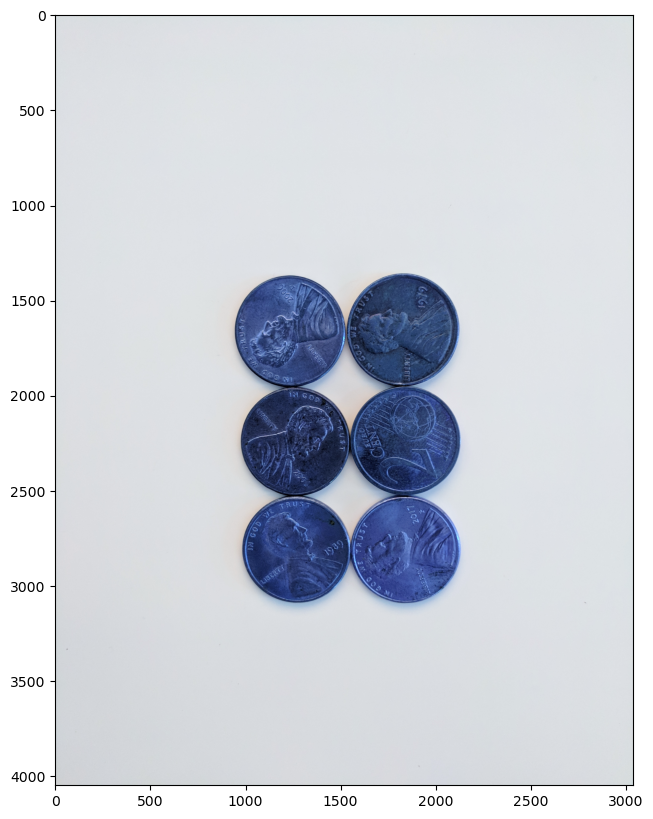

In [6]:
display(sepcoins)

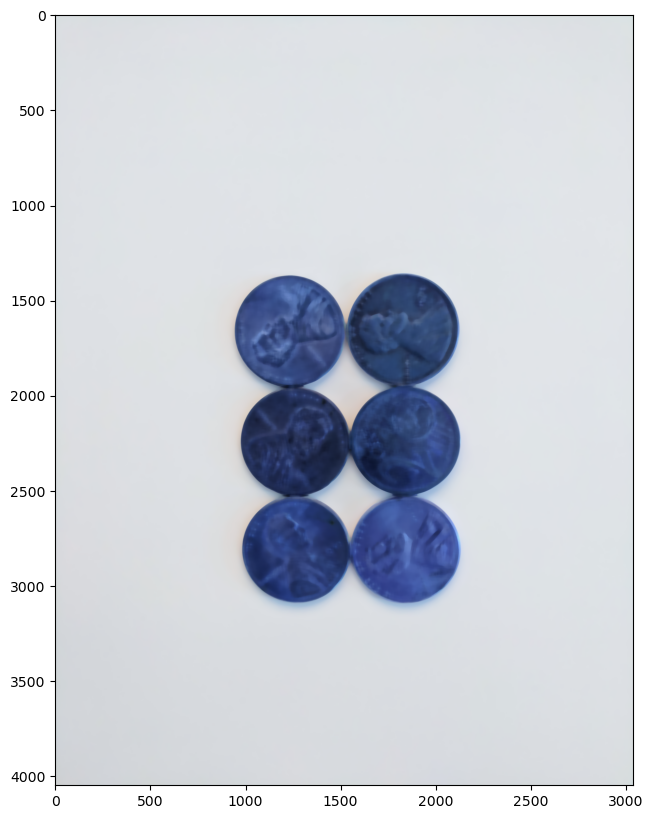

In [8]:
#medyan bulanıklaştırma bizim madeni paralardaki yüzlerin bulanıklaştırılmasına yardımcı alır yani made para yüzü biizm
#için gayet gereksiz bi özellik 
#median blur 
#grayscale 
#binary threshold   --->  nesneleri arka plandan ayırma 
#find contours 
sepblur=cv2.medianBlur(sepcoins,25)
display(sepblur)

In [9]:
graysepcoins=cv2.cvtColor(sepblur,cv2.COLOR_BGR2GRAY)

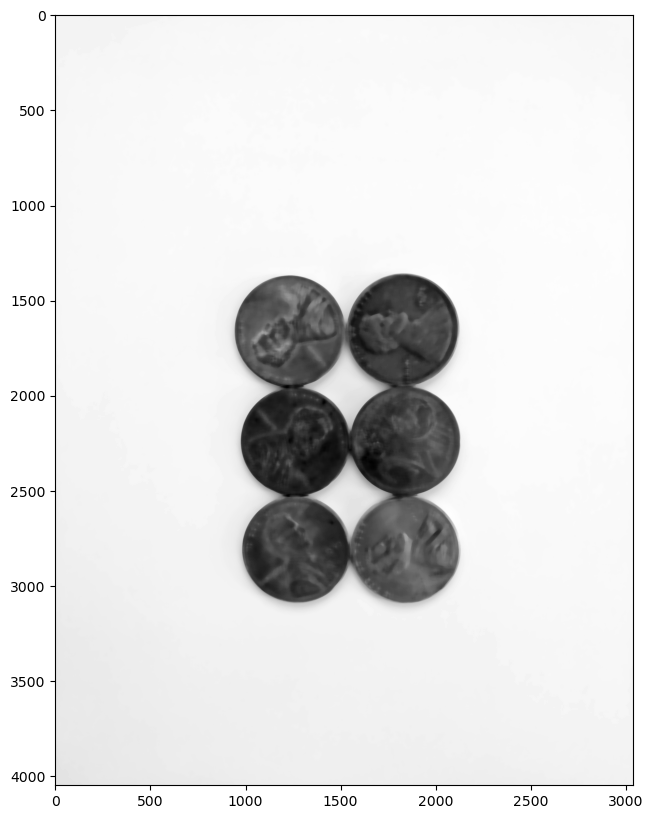

In [10]:
display(graysepcoins)

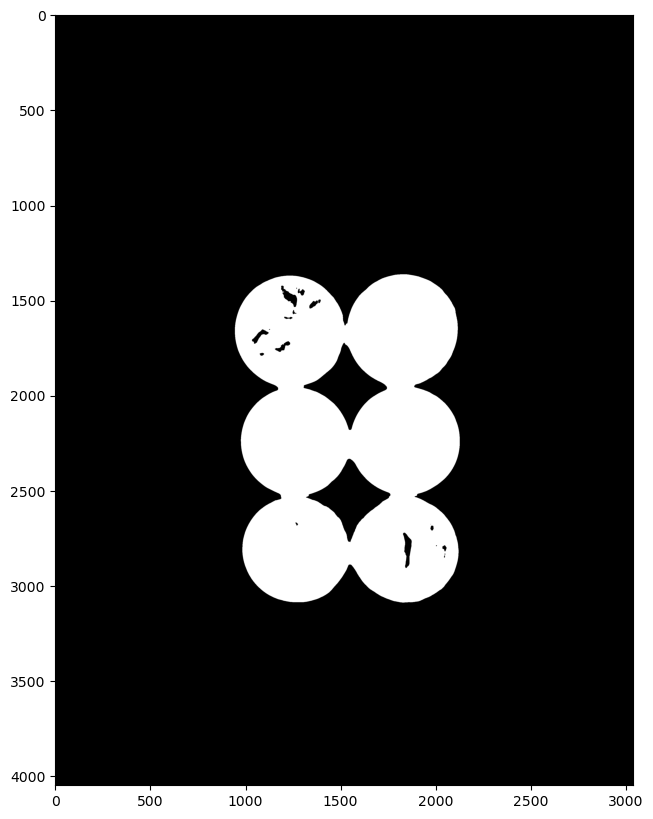

In [14]:
ret,septhresh = cv2.threshold(graysepcoins,127,255,cv2.THRESH_BINARY_INV) #ön plan beyaz olur yani ters 
display(septhresh)

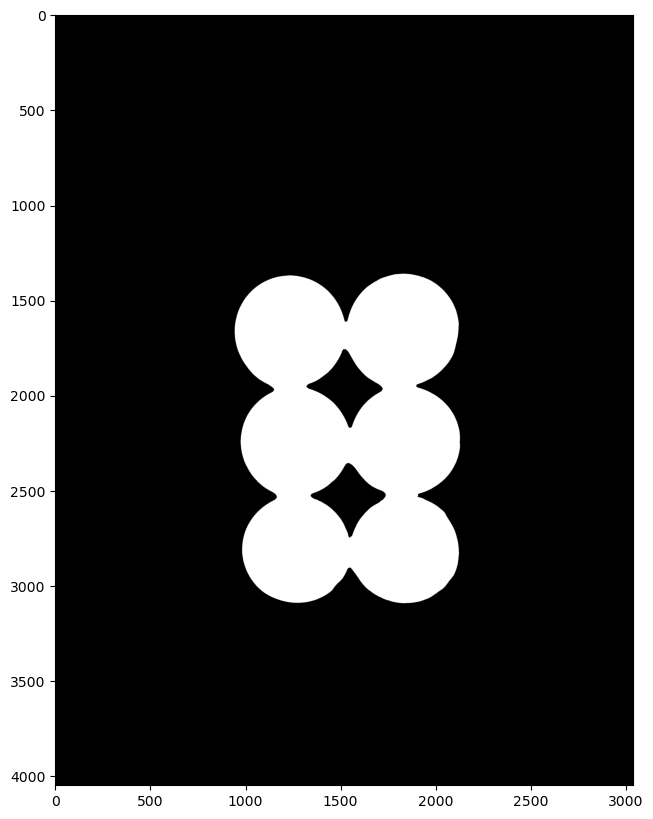

In [15]:
ret,septhresh = cv2.threshold(graysepcoins,160,255,cv2.THRESH_BINARY_INV) #ön plan beyaz olur yani ters 
display(septhresh)

In [16]:
contours,hierarchy=cv2.findContours(septhresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sepcoins,contours,i,(255,0,0),10)

In [ ]:
bir rengin veya yoğunluğunun sahip olduğu tüm sürekli noktaları birleştiren kapalı bir eğridir. Konturlar bir görüntüde
bulunan nesnelerin şekillerini temsil eder. Kontur algılama, şekil analizi ve nesne algılama ve tanıma için yararlı bir 
tekniktir. Kenar tespiti yaptığımızda, renk yoğunluğunun önemli ölçüde değiştiği noktaları buluruz ve sonra bu pikselleri
açarız. Bununla birlikte, konturlar, görüntüdeki nesnelerin şekillerine karşılık gelen soyut nokta ve segment koleksiyonları
dır. Sonuç olarak, programımızda kontür sayısını saymak, bunları nesnelerin şekillerini kategorize etmek için kullanmak, 
bir görüntüden nesneleri kırpmak (görüntü bölümleme) ve çok daha fazlası gibi konturları işleyebiliriz.

In [17]:
Hiç sorun değil, adım adım anlatacağım! OpenCV'de konturleme işlemi, görüntüdeki şekillerin, kenarların ve sınırların bulunması demektir. Şimdi basitçe başlayalım.

Konturleme (Contour Detection) Nedir?
Düşün ki bir kağıdın üzerine bir şekil çizdin (örneğin, bir kare ya da daire). Şimdi bu şeklin sadece çizgilerini (kenarlarını) bulmak istiyorsun. İşte konturleme tam olarak bunu yapar!

Kontur: Bir nesnenin dış sınırıdır. Yani, bir şeklin çevresindeki çizgidir.

Neden Konturleme Kullanırız?
Şekilleri Bulmak: Örneğin, bir resimdeki daireleri veya kareleri bulmak.
Bölge Alanını Hesaplamak: Bir şeklin ne kadar yer kapladığını öğrenmek.
Nesne Takibi: Hareketli bir nesnenin sınırlarını takip etmek.
Şekli Tanımak: Örneğin, bir kare mi yoksa daire mi olduğunu anlamak.
Nasıl Çalışır?
Görüntüyü Gri Tonlamaya Çeviririz (Grayscale): Renkli görüntülerde gereksiz bilgiyi azaltırız. Sadece parlaklık değerlerine bakarız.

Eşikleme veya Kenar Algılama Yaparız: Görüntüyü beyaz ve siyah piksellere ayırırız.

Beyaz olanlar şeklin içi.
Siyah olanlar arka plandır.
Konturları Buluruz: OpenCV, beyaz ile siyahın birleşim yerlerini (yani sınırları) bulur.

Kodla Açıklama
Şimdi bir kod yazalım ve ne yaptığını adım adım açıklayalım.

python
Kodu kopyala
import cv2

# 1. Görüntüyü yükle
img = cv2.imread('shapes.png')  # Bir şekil içeren resim seç

# 2. Gri tonlamaya çevir
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Eşikleme yap
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 4. Konturları bul
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 5. Konturları çiz
cv2.drawContours(img, contours, -1, (0, 255, 0), 3)  # Yeşil renk ve kalınlık 3

# 6. Görüntüyü göster
cv2.imshow("Contours", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

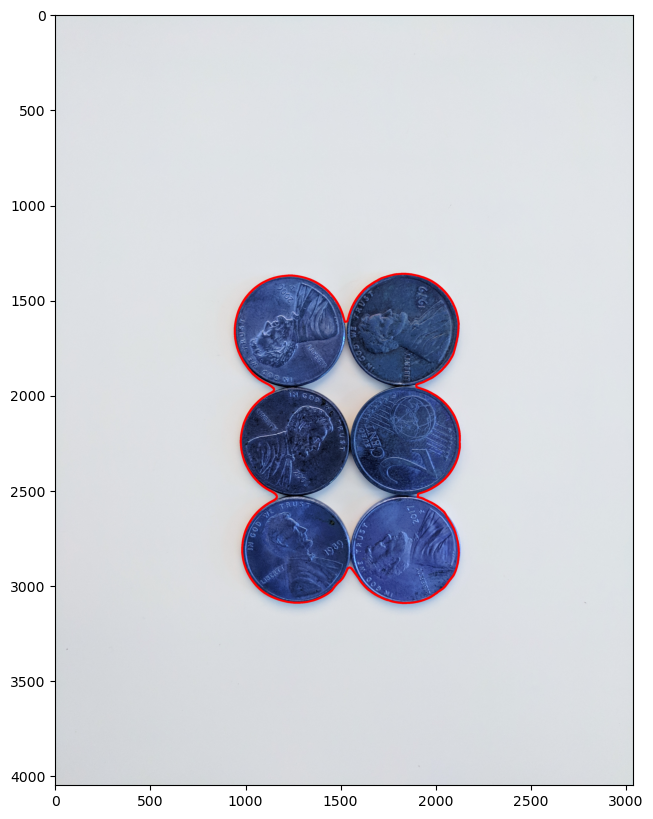

In [18]:
display(sepcoins)

In [19]:

img=cv2.imread(r"C:\Users\meric\Desktop\Computer-Vision-with-Python\DATA\pennies.jpg")

In [20]:
img=cv2.medianBlur(img,35) #çok büyük bir görüntü olduğundan dolayı ve çokça gürültü içerseydi daha yüksek sayı verebilridk 

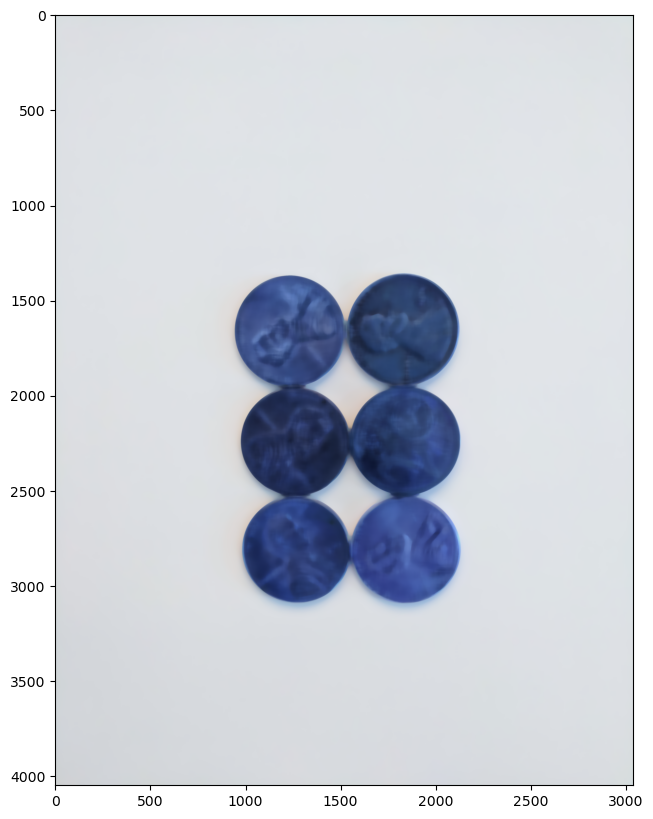

In [21]:
display(img)

In [22]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [23]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)

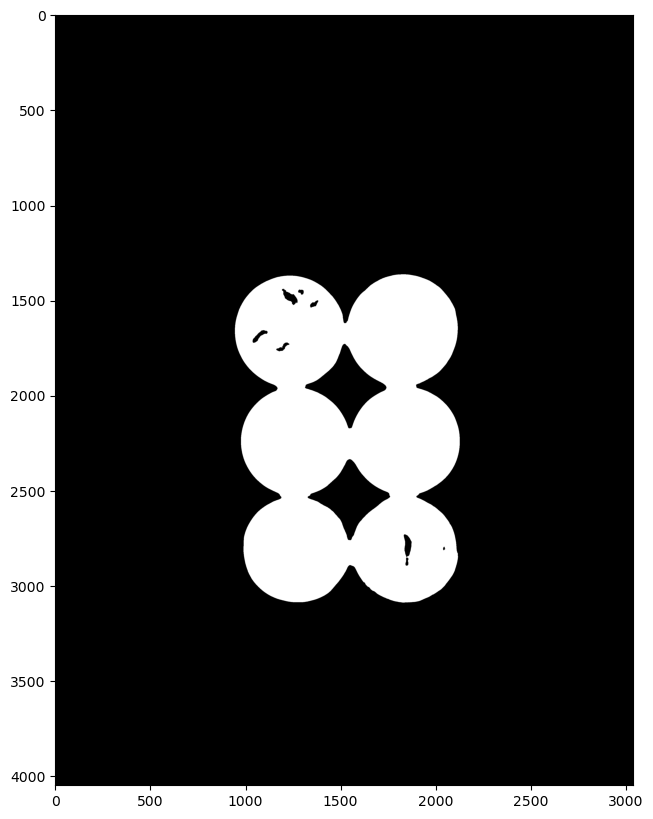

In [24]:
display(thresh) #daire içindeki gürültüleri kaldırmam gerekir bunun için otsu kullanmam gerek 

In [28]:
ret,thresh=cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)#daha kaliteli eşik değer elde ederiz 

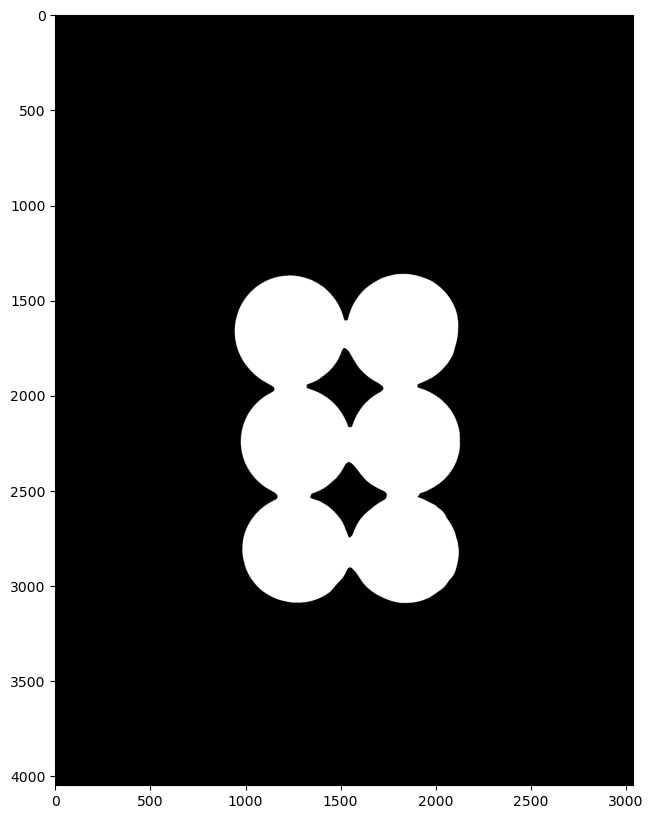

In [31]:
display(thresh)

In [ ]:
#GÜRÜLTÜ VARSA  ve eşik 2 li değer yapmaya çalışıyorsak 

In [32]:
kernel =np.ones((3,3),np.uint8)

In [33]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [34]:
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

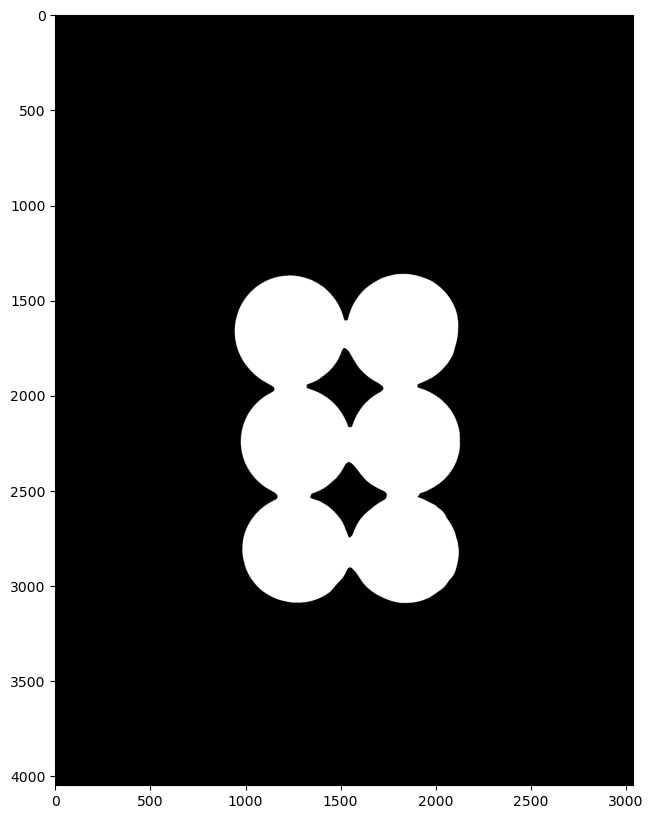

In [35]:
display(opening)

In [44]:
surebg=cv2.dilate(opening,kernel,iterations=3)

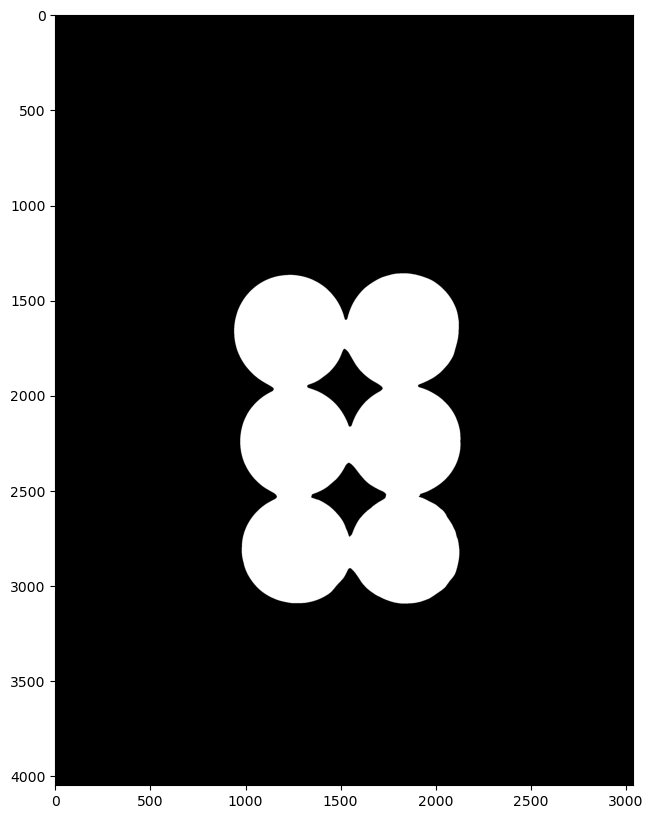

In [45]:
display(surebg)

In [ ]:
# bu algoritmada havza watershipte her cisim için tohum oluşturma yapılmalıdır her merkeze tohum
#ön planda olan ve aynı zamanda arka planda olan emin olduğumuz şeyleri nasıl yakalıyoruz buna 
#buna mesafe dönüşümü  distnace transform 
#2li görüntü verilirse sadece sıfır 1 255 olmalıdır 
#mesaf. dön. sıfırdan uzaklaştıkça değerin yükselmesi yani daha parlak görünmesidir sslere bak 1286
#yani merkezden değerlerin yüksek yerlerinden uzakalitıkça renk kararıyor parlaklıktan uzaklaşıyor 

In [36]:
disttrans=cv2.distanceTransform(opening,cv2.DIST_L2,5)

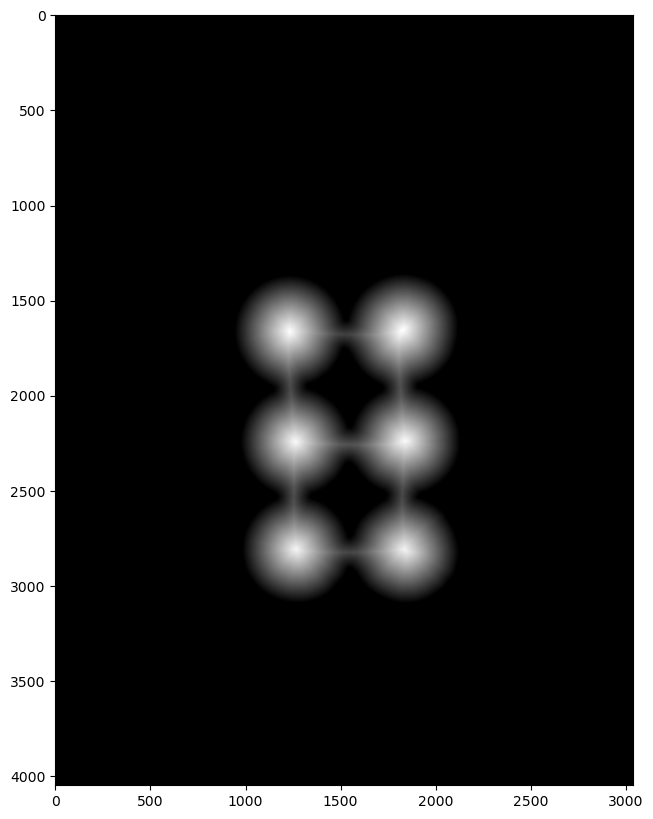

In [37]:
display(disttrans)

In [41]:
#bu 6 noktayı yakalamak için farklı bir eşikleme kullanacağım   ön plandan emin olduğum 6 nesne oluşturacam
#ret  doğru  , surefg  önplan
ret,surefg=cv2.threshold(disttrans,0.7*disttrans.max(),255,0)

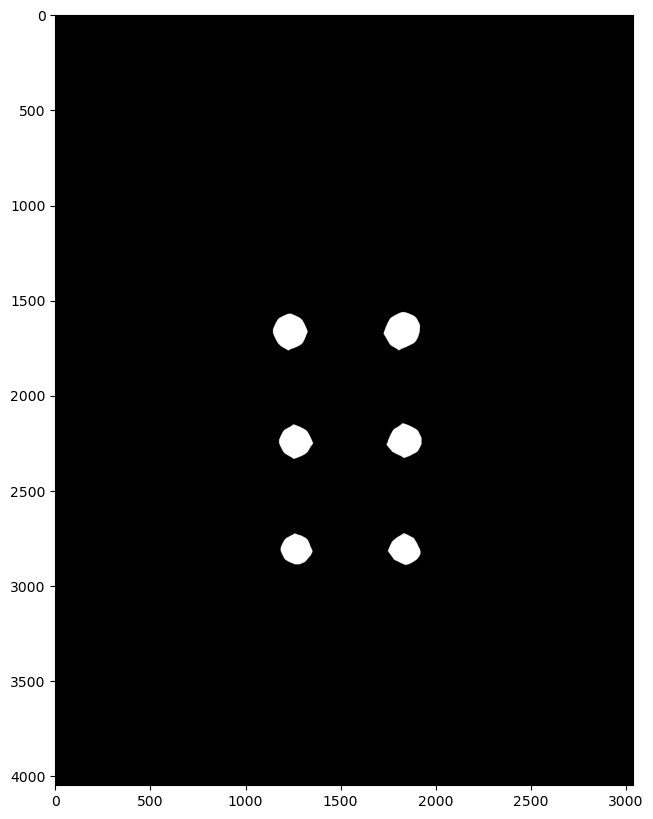

In [42]:
display(surefg)

In [46]:
surefg=np.uint8(surefg)#tam sayı     beyaz renkte bulunmayan her şey bilinmeyen olarak atanır 

In [47]:
unknown=cv2.subtract(surebg,surefg)

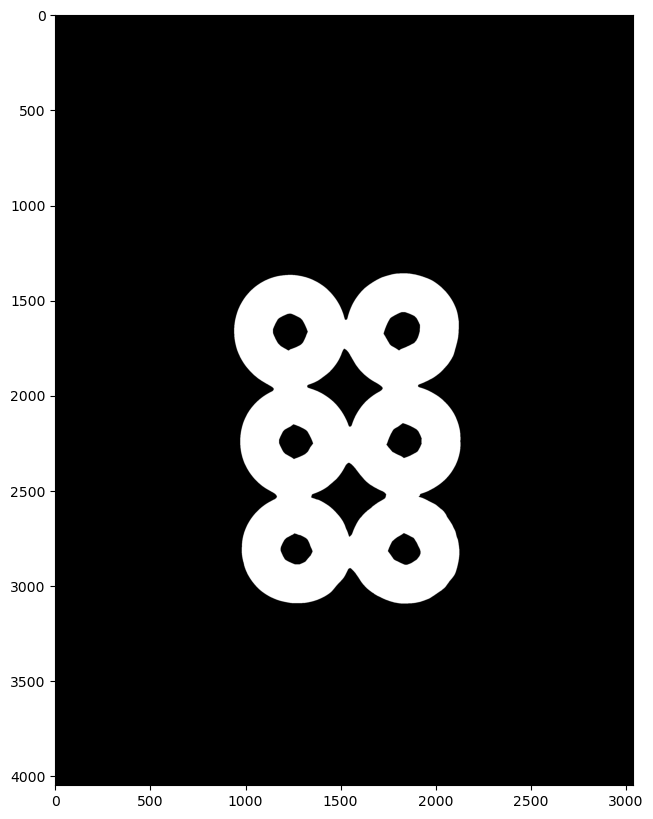

In [48]:
display(unknown) #her altı ön plan noktasından etiket oluşturup havza algoritmasının segmentini bulmak için
#kullandığı tohumlar olmasını sağlamak  yani işaretleyici oluşturmak için 3 adım 

In [50]:
ret,markers=cv2.connectedComponents(surefg)

In [51]:
markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [53]:
#arka planın sufur değil  1 olması için tüm etiketlere 1 eklemek istiiyoruz 
markers=markers+1#bilinmeyen bölgeyi 0 yapmak için 
#bilinmeyen bölge toplam resmin merkez kısmı gibi bir yer   
#1 arttırdık şimdi bilinmeyen kısımları 0 yapcaz 1 arttıdık ki bilinmeyenleri 0 yaptık karışmasın birbirlerine 
markers[unknown==255]=0

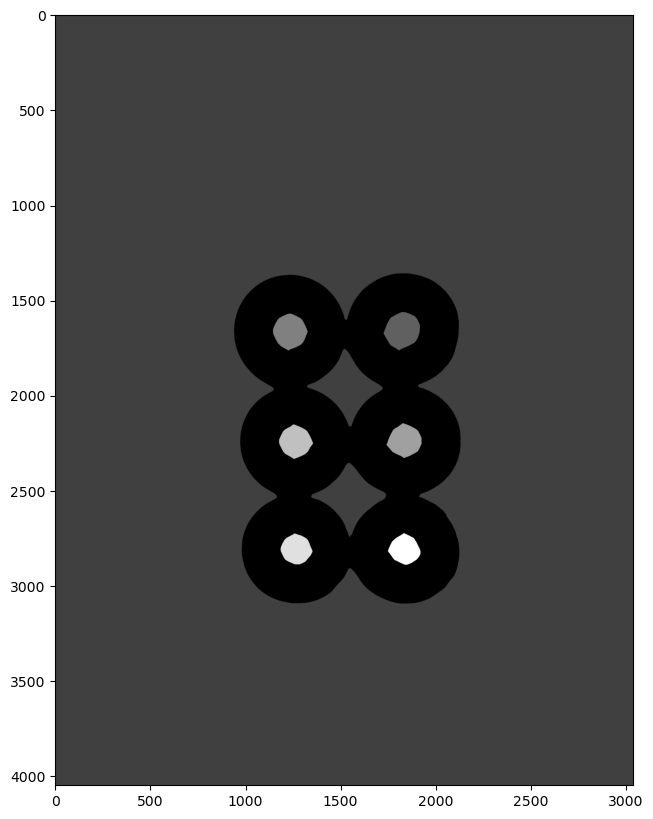

In [54]:
display(markers)#arkadaki gri renk, emin arka plan  siyah alan bilinmeyen alan ama siyahların ön plan mı arka plan mı emin değiliz


In [55]:
markers=cv2.watershed(img,markers)

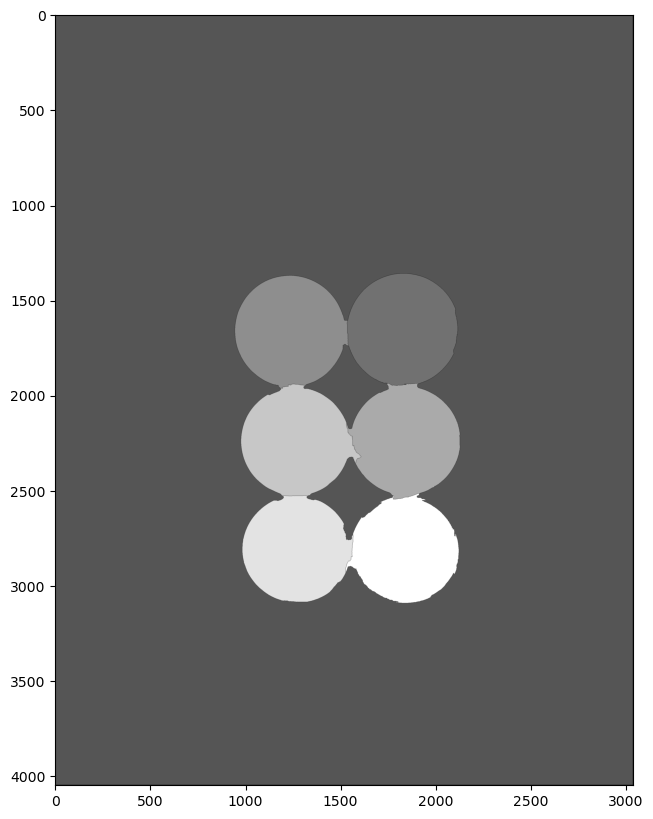

In [56]:
display(markers)

In [57]:
contours,hierarchy=cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3]==-1:
        cv2.drawContours(sepcoins,contours,i,(255,0,0),10)

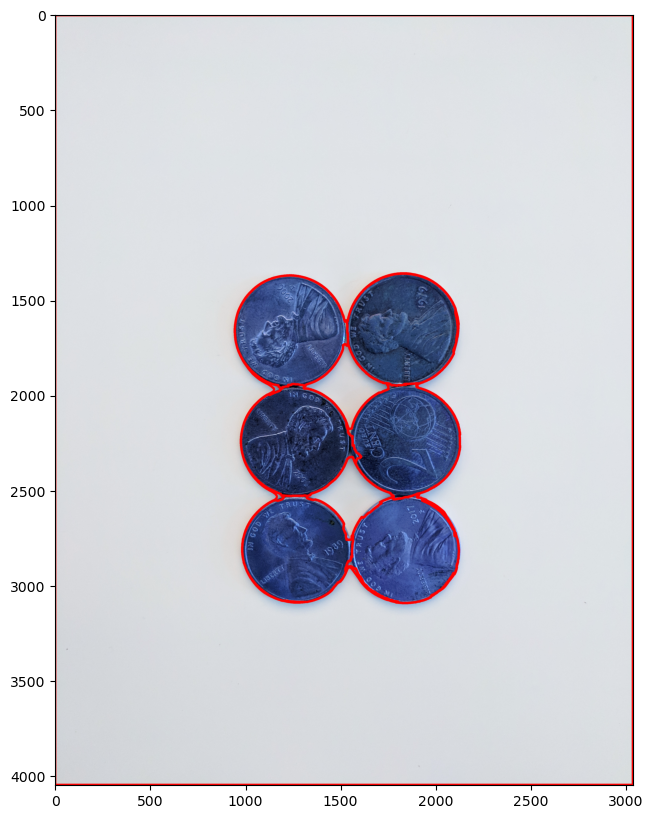

In [59]:
display(sepcoins)